### Exploratory Data Analysis on 'IPL Dataset'
<ul>
    <li>Problem Statement: Perform Exploratory Data Analysis on 'Indian Premiere League'</li>
    <li>As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.</li>
    <li>Suggest teams or players a company should endorse for its products.</li>

GRIP JULY'21
    
 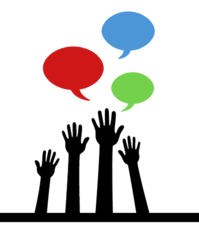

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
match_df = pd.read_csv('matches.csv')
bowl_df = pd.read_csv('deliveries.csv')
pd.set_option('display.max_column', None)
match_df.head(10)                     

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
bowl_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
final_df = pd.merge(match_df, bowl_df, left_on = 'id', right_on = 'match_id').drop('match_id', axis = 1)

In [5]:
final_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
for i in final_df.columns:
    print(i, final_df[i].nunique())

id 756
season 12
city 32
date 546
team1 15
team2 15
toss_winner 15
toss_decision 2
result 3
dl_applied 2
winner 15
win_by_runs 89
win_by_wickets 11
player_of_match 226
venue 41
umpire1 61
umpire2 65
umpire3 25
inning 5
batting_team 15
bowling_team 15
over 20
ball 9
batsman 516
non_striker 511
bowler 405
is_super_over 2
wide_runs 6
bye_runs 5
legbye_runs 6
noball_runs 5
penalty_runs 2
batsman_runs 8
extra_runs 7
total_runs 10
player_dismissed 487
dismissal_kind 9
fielder 499


In [7]:
final_df.isnull().sum()

id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
umpire2                500
umpire3             150712
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
f

In [8]:
final_df.drop(['umpire3'], axis = 1, inplace = True)

In [9]:
final_df.shape

(179078, 37)

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                179078 non-null  int64 
 1   season            179078 non-null  int64 
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

In [11]:
final_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,2013.444510,0.017914,13.404036,3.261579,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,3.363947,0.132639,23.261007,3.347033,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,2008.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,2011.000000,0.000000,0.000000,0.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,2013.000000,0.000000,0.000000,3.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2016.000000,0.000000,19.000000,6.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [12]:
final_df[final_df.city.isnull()][['city', 'venue']]

,city,venue
109377,NaN,Dubai International Cricket Stadium
109378,NaN,Dubai International Cricket Stadium
109379,NaN,Dubai International Cricket Stadium
109380,NaN,Dubai International Cricket Stadium
109381,NaN,Dubai International Cricket Stadium
...,...,...
113170,NaN,Dubai International Cricket Stadium
113171,NaN,Dubai International Cricket Stadium
113172,NaN,Dubai International Cricket Stadium
113173,NaN,Dubai International Cricket Stadium


<li> We can see that Dubai International Cricket Stadium has NaN value in City column. We can fill Dubai in City column to remove missing values</li>

In [13]:
final_df['city'] = final_df['city'].fillna('Dubai')

In [14]:
final_df['city'].nunique()

33

In [15]:
final_df['venue'].nunique()

41

##### We have 33 uique values for city while venue has 41 unique values

In [16]:
city_venue = final_df.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                  1624
Ahmedabad      Sardar Patel Stadium, Motera                          2893
Bangalore      M Chinnaswamy Stadium                                15155
Bengaluru      M Chinnaswamy Stadium                                 1717
               M. Chinnaswamy Stadium                                1531
Bloemfontein   OUTsurance Oval                                        500
Cape Town      Newlands                                              1539
Centurion      SuperSport Park                                       2866
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...    2574
               Punjab Cricket Association Stadium, Mohali            8266
Chennai        M. A. Chidambaram Stadium                             1889
               MA Chidambaram Stadium, Chepauk                      12006
Cuttack        Barabati Stadium                                      1695
Delhi          Feroz Shah Kotla                                     15604
               Feroz Shah Kotla Ground                               1701
Dharamsala     Himachal Pradesh Cricket Association Stadium          2159
Dubai          Dubai International Cricket Stadium                   1700
Durban         Kingsmead                                             3643
East London    Buffalo Park                                           715
Hyderabad      Rajiv Gandhi International Stadium, Uppal            13303
               Rajiv Gandhi Intl. Cricket Stadium                    1912
Indore         Holkar Cricket Stadium                                1965
Jaipur         Sawai Mansingh Stadium                               11158
Johannesburg   New Wanderers Stadium                                 1940
Kanpur         Green Park                                             921
Kimberley      De Beers Diamond Oval                                  726
Kochi          Nehru Stadium                                         1155
Kolkata        Eden Gardens                                         17991
Mohali         IS Bindra Stadium                                     1690
               Punjab Cricket Association IS Bindra Stadium, M...     741
Mumbai         Brabourne Stadium                                     2719
               Dr DY Patil Sports Academy                            3993
               Wankhede Stadium                                     17590
Nagpur         Vidarbha Cricket Association Stadium, Jamtha           742
Port Elizabeth St George's Park                                      1677
Pune           Maharashtra Cricket Association Stadium               5055
               Subrata Roy Sahara Stadium                            4064
Raipur         Shaheed Veer Narayan Singh International Stadium      1431
Rajkot         Saurashtra Cricket Association Stadium                2381
Ranchi         JSCA International Stadium Complex                    1671
Sharjah        Sharjah Cricket Stadium                               1439
Visakhapatnam  ACA-VDCA Stadium                                       491
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...    2546

#### Observation:
<ul>
    <li>Bengaluru and Bangalore both are in the data when they are same. So we need to keep one of them</li>
    <li>Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali whose value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of the stadium</li>
    <li>Mumbai has 3 stadiums/venues used for IPL</li>
    <li>Pune has 2 venues for IPL</li>

In [17]:
missing_value = (((final_df.isnull().sum()).sum())/final_df.size)*100
missing_value

7.770462697366058

### Analysis

In [22]:
match_df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [23]:
match_df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

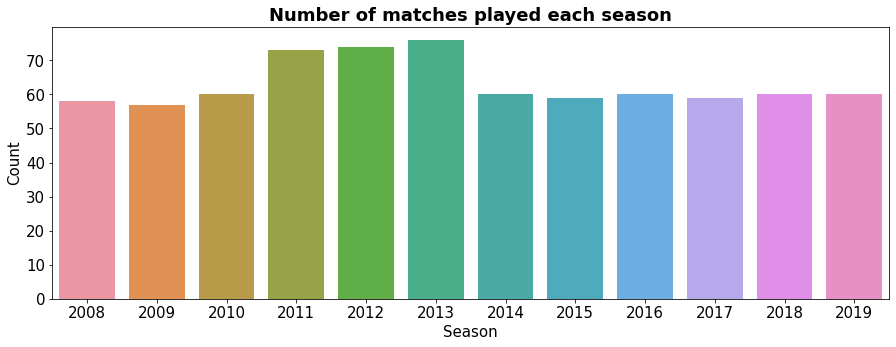

In [25]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = match_df)
plt.title("Number of matches played each season",fontsize=18,fontweight="bold")
plt.ylabel("Count", size = 15)
plt.xlabel("Season", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

#### While other years there was 58-60 matches while 2011-13 had around 70 matches.

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

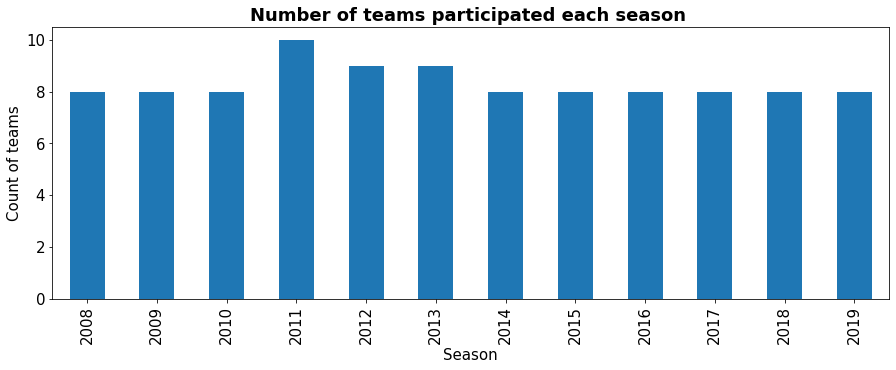

In [26]:
final_df.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 15)
plt.xlabel("Season", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

#### Ten team participated in 2011 while Nine team participated in 2012 and 2013 that is why it has more matches.

### Venue which has highest number of macthes.

Text(0.5, 0, 'Frequency')

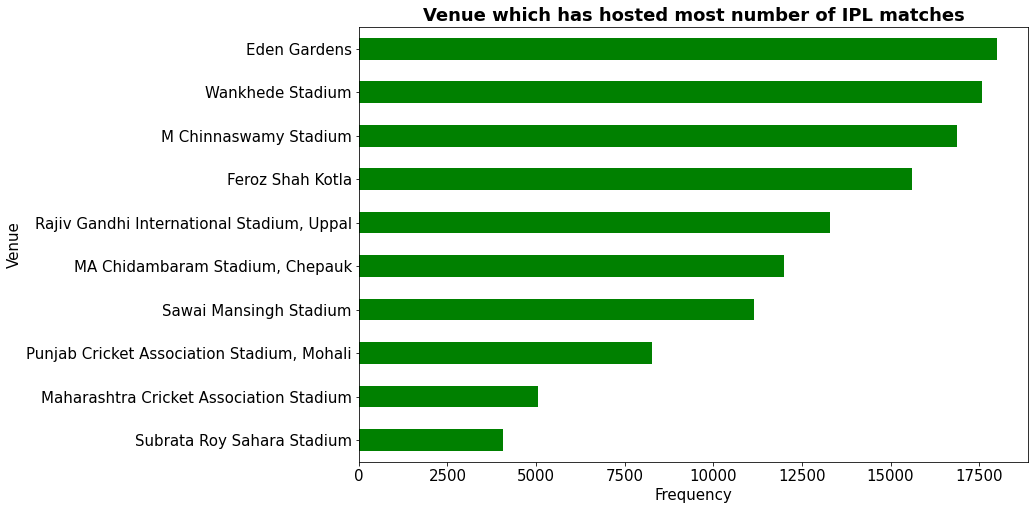

In [28]:
final_df['venue'].value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='green')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 15)
plt.xlabel("Frequency", size = 15)

#### Eden garden has hosted highest number of IPL matches follow up by Wankhede Stadium.

### Which Team has Maximum IPL win so far

In [29]:
#creating a dataframe with season and winner columns
winning_teams = final_df[['season','winner']]

In [30]:
#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(0, 1, 'Chennai Super Kings'),
  Text(0, 2, 'Kolkata Knight Riders'),
  Text(0, 3, 'Rajasthan Royals'),
  Text(0, 4, 'Sunrisers Hyderabad'),
  Text(0, 5, 'Deccan Chargers')])

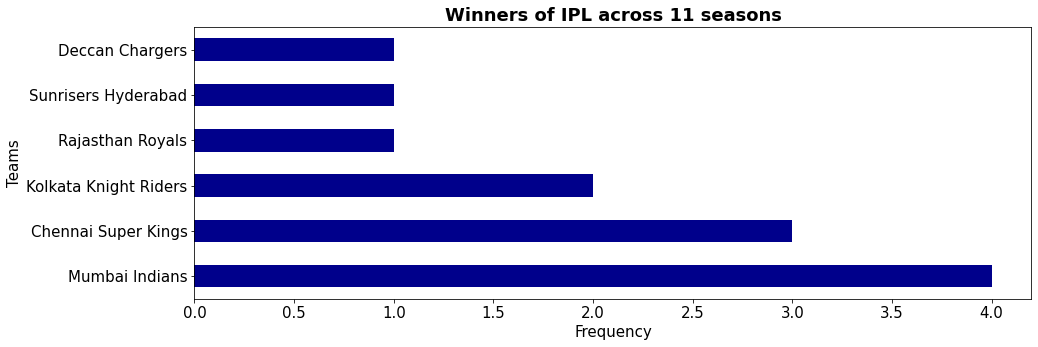

In [31]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'darkblue')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 15)
plt.xlabel("Frequency", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)

#### MI won IPl 4 times while CSK won 3 times and Kolkata Knight Riders won 2 times.

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

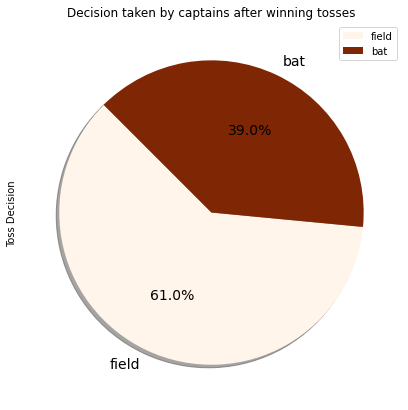

In [32]:
final_df['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='Oranges')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

#### Almost 60% team chose to field when they win toss.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

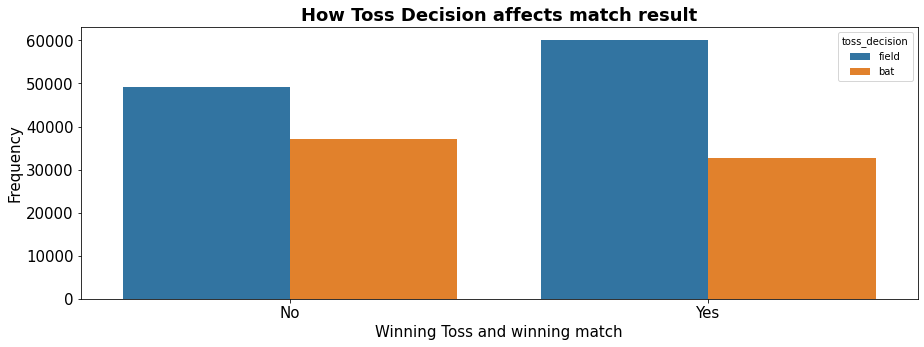

In [33]:
final_df['toss_win_game_win'] = np.where((final_df.toss_winner == final_df.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=final_df, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

#### Team Winning toss has highe chances of winning matches as they have upperhand to decide to bat or bowl accroding to pitch report.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

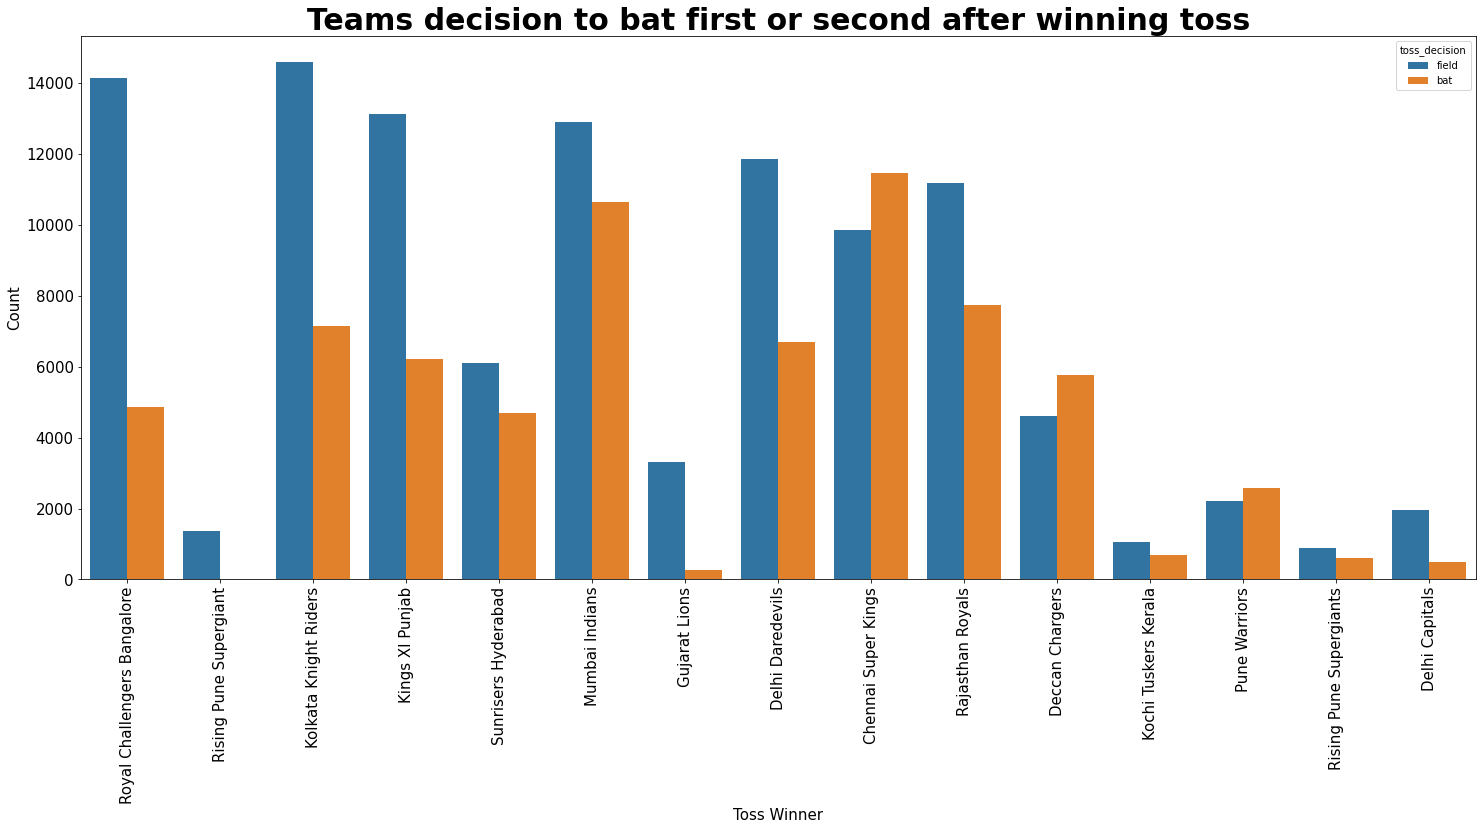

In [34]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = final_df, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size =15)
plt.xticks(rotation=90)
plt.ylabel("Count", size = 15)

#### Most Teams Choose field first after winning toss except CSK who has mostly opted bat first , Decan Charges and Pune Warriors show sa,e trend. Ms Dhoni was captain of Both CSK and Pune Warriors so we can see similar trend in this both teams.

Text(0.5, 0, 'Players')

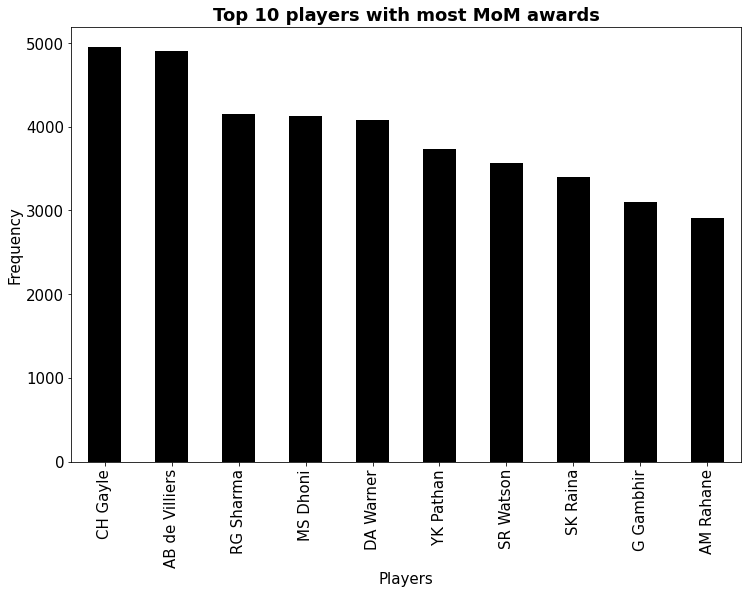

In [35]:
MoM= final_df['player_of_match'].value_counts()
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='black')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 15)
plt.xlabel("Players", size = 15)

<ul> 
    <li>Chrish Gayle has the highest Man Of the Match Award Followed by AB De Villiers which shows how batsman dictated the IPL</li>

<ipython-input-36-d72264f8ef8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')


Text(0, 0.5, 'Venue')

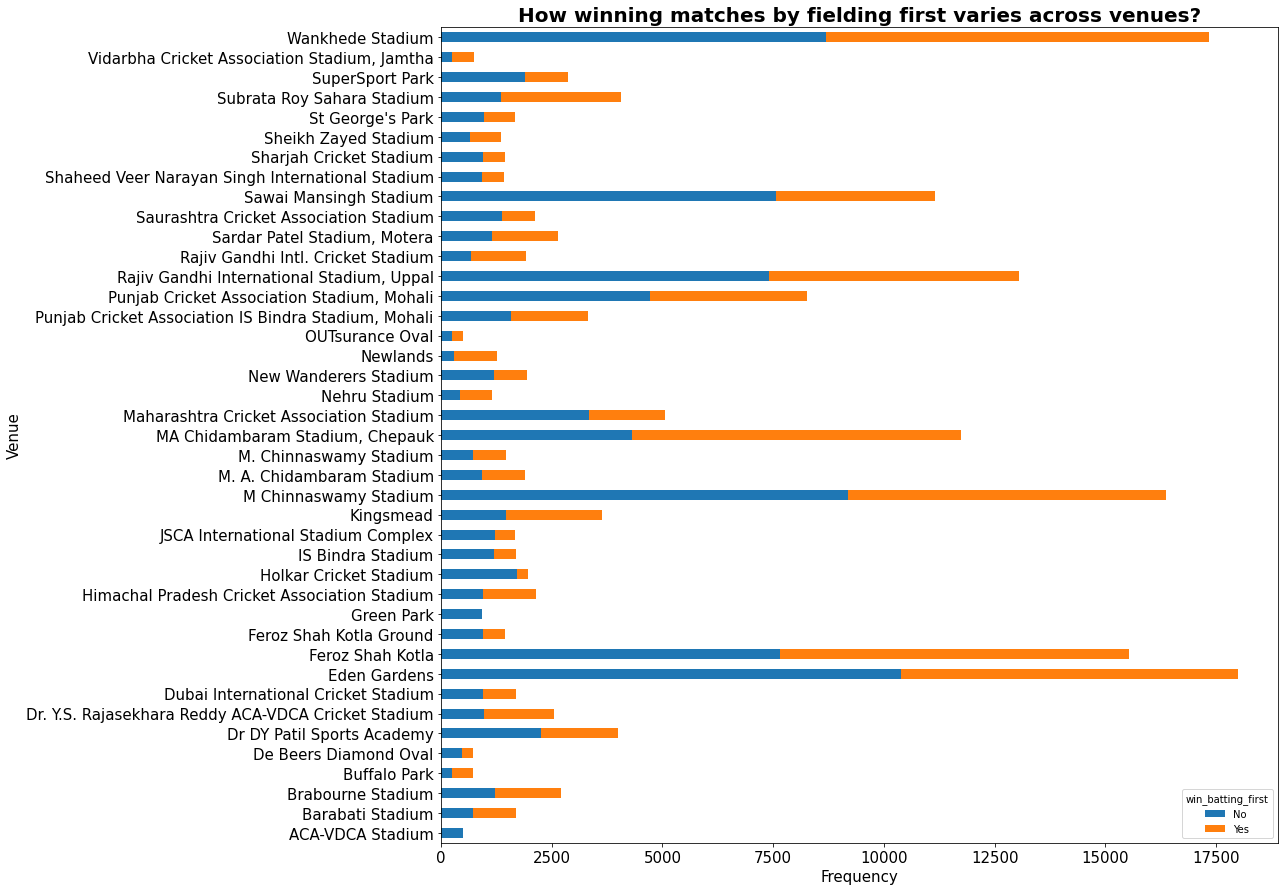

In [36]:
new_matches = final_df[final_df['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?", fontsize=20,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Frequency", fontsize = 15)
plt.ylabel("Venue", fontsize = 15)

###### Batting second has been more rewarding in almost all venues.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

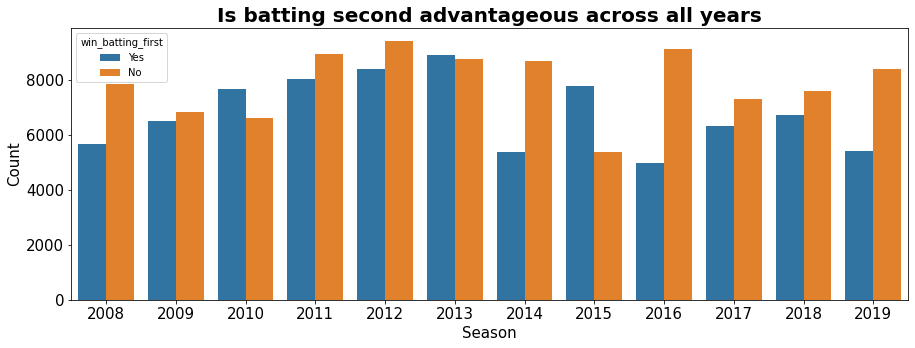

In [37]:
plt.figure(figsize = (15,5))
sns.countplot('season', data = new_matches, hue = 'win_batting_first')
plt.title("Is batting second advantageous across all years", fontsize=20,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Season", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

##### Exceptt for 2010 and 2015, in all other years it can be seen that teams batting second have won more matches

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

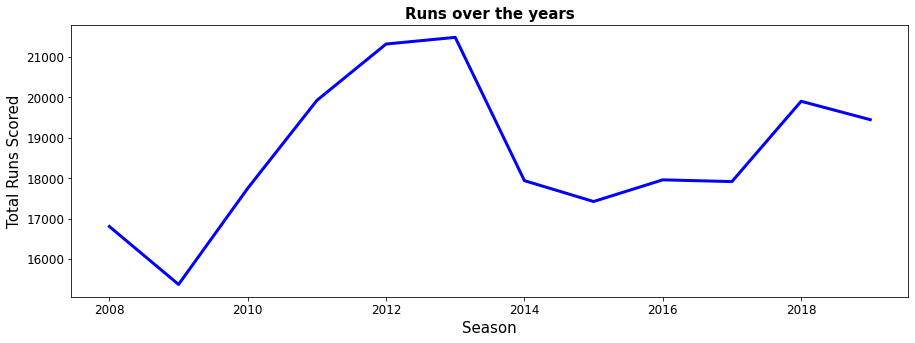

In [38]:
final_df.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5), color = 'blue')
plt.title("Runs over the years",fontsize= 15, fontweight = 'bold')
plt.xlabel("Season", size = 15)
plt.ylabel("Total Runs Scored", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

#### Run Scoring Increased As IPL Moved further.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

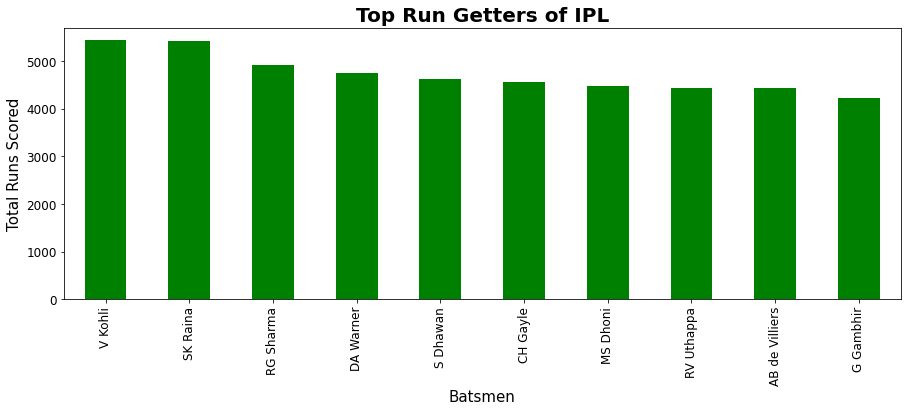

In [39]:
#let's plot the top 10 run getter so far in IPL
final_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 15)
plt.ylabel("Total Runs Scored", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

<ul>
    <li>Raina is the highest run scorerin IPL followed by Virat Kohli</li>
    <li> Except for MS Dhoni, all other top run getters are either openers or come in 3rd or 4th positions to bat</li>

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

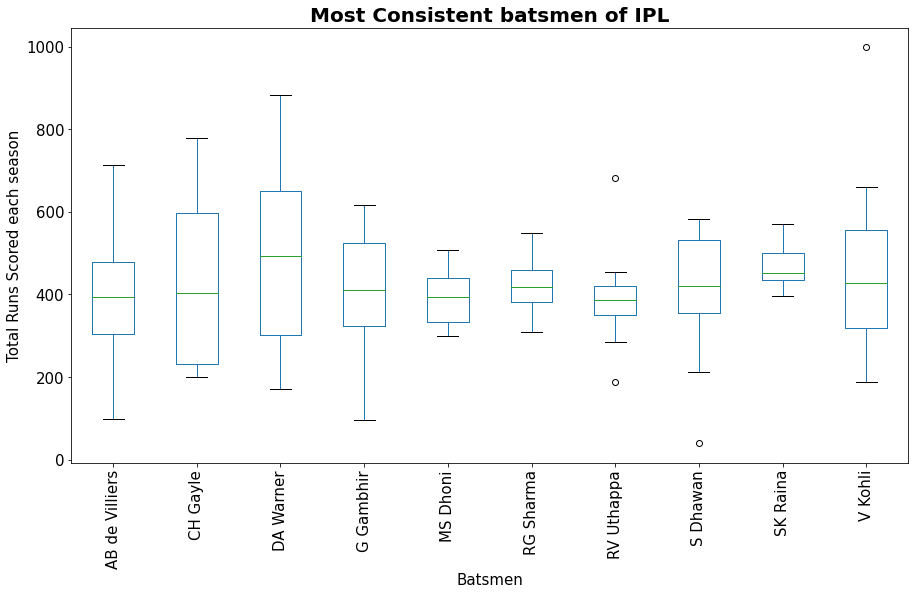

In [40]:
consistent_batsman = final_df[final_df.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 15)
plt.ylabel("Total Runs Scored each season", size = 15)
plt.xticks(size = 15)
plt.xticks(rotation=90)
plt.yticks(size = 15)

###### Median score for Raina is above all the top 10 run getters. He has the highest lowest run among all the batsmen across 11 seasons. Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

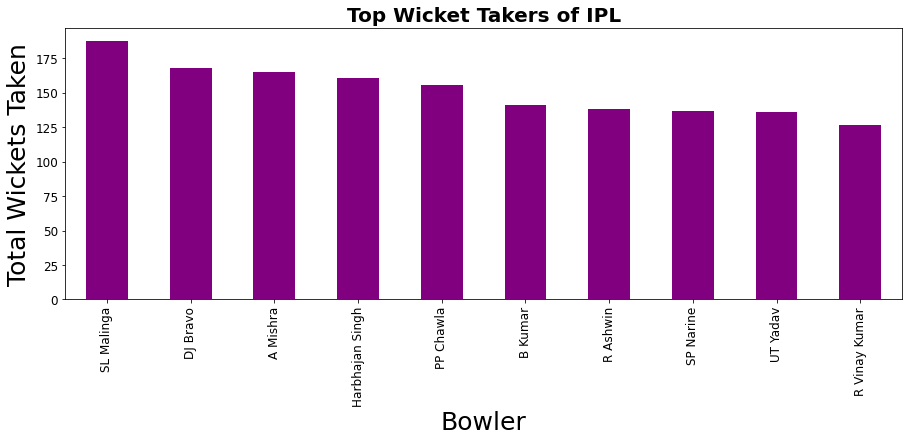

In [41]:
final_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

<ul>
    <li>Malinga has taken the most number of wickets in IPL followed by Bravo and Amit Mishra</li>
    <li>In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners</li>
    <li>All 5 spinners are right arm spinners and 2 are leg spinners while 3 are off spinners</li>
    <li>All 5 pacers are right arm pacers</li>

In [42]:
#We will consider players who have played 10 or more seasons
no_of_balls = pd.DataFrame(final_df.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(final_df.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(final_df.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

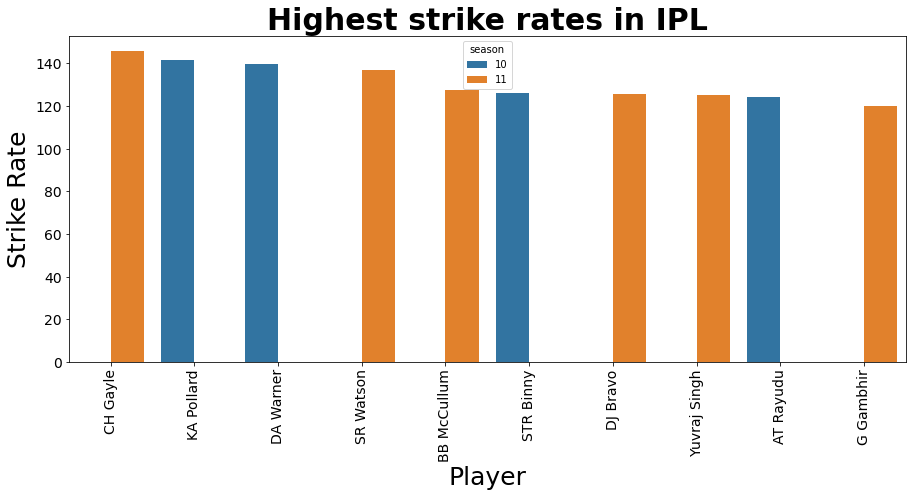

In [43]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.xticks(rotation=90)
plt.yticks(size = 14)

<ul>
    <li>AB de Villiers, Gayle have the highest strike rates in IPL. They are the big hitters and can win any match on their day</li>

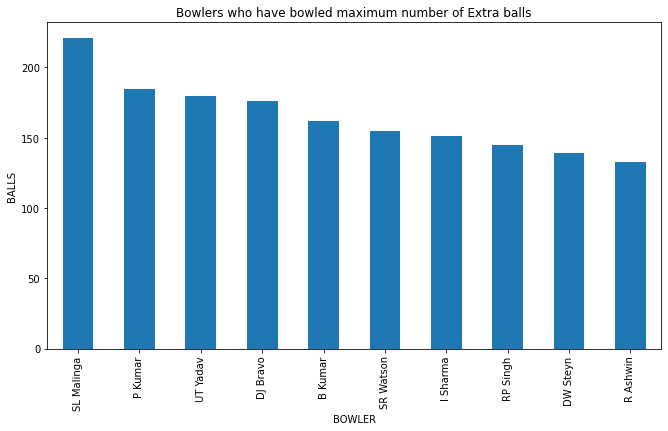

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [44]:
extra = final_df[final_df['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T

In [45]:
#strike_rate = balls bowled by wickets taken
balls_bowled = pd.DataFrame(final_df.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(final_df[final_df['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(final_df.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

In [46]:
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
def highlight_cols(s):
    color = 'skyblue'
    return 'background-color: %s' % color
#Strike rate for bowlers who have taken more than 50 wickets
best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


### Conclusion:
#### As a sports analysts, The most successful teams, players & factors contributing win or loss of a team:
<ul>
    <li>Mumbai Indians is the most successful team in IPL and has won the most number of toss.</li>
    <li>There were more matches won by chasing the total(419 matches) than defending(350 matches).</li>
    <li>When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).</li>
    <li>When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.</li>
    <li>The Mumbai city has hosted the most number of IPL matches.</li>
    <li>Chris Gayle has won the maximum number of player of the match title.</li>
    <li>S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field</li>
    <li>Eden Gardens has hosted the maximum number of IPL matches.</li>
    <li>If a team wins a toss choose to field first as it has highest probablity of winning</li>
    

#### Teams or Players a company should endorse for its products.
<ul>
    <li>If the franchise is looking for a consistant batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner.</li>
    <li>If the franchise is looking for a game changing batsman then go for Chris Gayle, AB deVillers, R Sharma , MS Dhoni</li>
    <li>If the franchise is looking for a batsman who could score good amount of runs every match the go for DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan</li>
    <li>If the franchise needs the best finisher in lower order having good strike rate then go for CH Gayle,KA Pollard, DA Warner,SR Watson,BB McCullum</li>
    <li>If the franchise need a experienced bowler then go for Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo</li>
    <li>If the franchise need a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla</li>
    <li>If the franchise need a bowler bowling most number of dot balls then go for Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla</li>
    <li>If the franchise need a bowler with good economy then go for DW Steyn ,M Muralitharan ,R Ashwin,SP Narine ,Harbhajan Singh</li>